In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/imhardikj/A-Model-a-Day/master/K-Nearest%20Neighbors/Classified%20Data.csv',index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()


In [8]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler()

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis =1))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


  NOW DOING TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

#    using KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

lets evaluate our KNN MODEL

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print (confusion_matrix(Y_test,pred))

[[134  19]
 [ 14 133]]


In [20]:
print (classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       153
           1       0.88      0.90      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# CHOOSING K value"

In [21]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

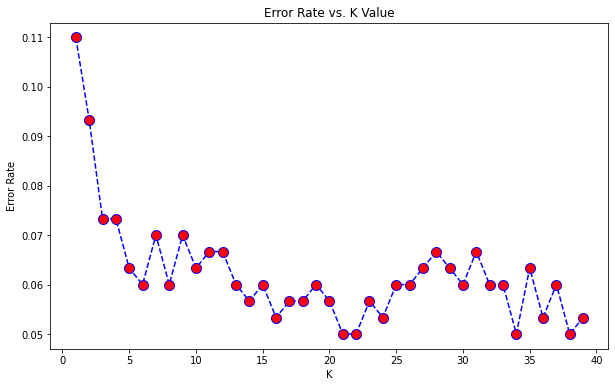

In [26]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle = 'dashed',marker ='o',markerfacecolor='red',markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
##quick comparision
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
    
print ('WITH K = 1')
print ('\n')
print (confusion_matrix(Y_test,pred))
print ('\n')
print (classification_report(Y_test,pred))
    
    
    
    
    

WITH K = 1


[[134  19]
 [ 14 133]]


              precision    recall  f1-score   support

           0       0.91      0.88      0.89       153
           1       0.88      0.90      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [36]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
    
print ('WITH K = 23')
print ('\n')
print (confusion_matrix(Y_test,pred))
print ('\n')
print (classification_report(Y_test,pred))
    
    

WITH K = 23


[[144   9]
 [  8 139]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       153
           1       0.94      0.95      0.94       147

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

